# Análise Estatística de Vendas com Python

## Contexto
Este projeto tem como objetivo realizar uma análise estatística descritiva
sobre dados de vendas simulados, buscando entender o comportamento típico,
a dispersão dos valores e a presença de outliers.

Os dados representam vendas de produtos alimentícios ao longo do tempo.

## 1. Criação do Dataset

In [3]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 300

In [4]:
datas = pd.date_range(start="2024-01-01", periods=n, freq="D")

produtos = np.random.choice(
    ["Picanha", "Alcatra", "Fraldinha", "Costela", "Maminha"],
    size=n
)

categorias = np.random.choice(
    ["Bovina", "Suína", "Aves"],
    size=n
)

preco_unitario = np.random.uniform(30, 120, size=n).round(2)

quantidade = np.random.randint(1, 10, size=n)


In [7]:
## 3) Célula 3 — Calcular valor_total
valor_total = (preco_unitario * quantidade).round(2)

In [8]:
## 4) Célula 4 — Criar o DataFrame
df = pd.DataFrame({
    "data": datas,
    "produto": produtos,
    "categoria": categorias,
    "preco_unitario": preco_unitario,
    "quantidade": quantidade,
    "valor_total": valor_total
})

In [9]:
## 5) Célula 5 — Inserir outliers (vendas fora do padrão)
outliers = np.random.choice(df.index, size=5, replace=False)
df.loc[outliers, "valor_total"] = (df.loc[outliers, "valor_total"] * 5).round(2)


## 2. Exploração Inicial dos Dados

#### df.head() mostra 5 linhas com as colunas certinhas

In [11]:
df.head()

,data,produto,categoria,preco_unitario,quantidade,valor_total
0,2024-01-01,Costela,Bovina,115.25,1,115.25
1,2024-01-02,Maminha,Bovina,118.74,7,831.18
2,2024-01-03,Fraldinha,Bovina,97.80,2,195.60
3,2024-01-04,Maminha,Suína,63.86,5,319.30
4,2024-01-05,Maminha,Bovina,37.52,8,300.16


#### df.info() mostra 300 linhas, 6 colunas

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   data            300 non-null    datetime64[ns]
 1   produto         300 non-null    object        
 2   categoria       300 non-null    object        
 3   preco_unitario  300 non-null    float64       
 4   quantidade      300 non-null    int32         
 5   valor_total     300 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int32(1), object(2)
memory usage: 13.0+ KB


#### df.describe() mostra estatísticas de preco_unitario, quantidade, valor_total

In [13]:
df.describe()

,data,preco_unitario,quantidade,valor_total
count,300,300.000000,300.000000,300.000000
mean,2024-05-29 12:00:00,74.338667,4.940000,395.881200
min,2024-01-01 00:00:00,31.020000,1.000000,31.090000
25%,2024-03-15 18:00:00,51.237500,3.000000,173.945000
50%,2024-05-29 12:00:00,73.455000,5.000000,333.160000
75%,2024-08-12 06:00:00,97.295000,7.000000,501.450000
max,2024-10-26 00:00:00,119.970000,9.000000,4304.400000
std,NaN,26.391573,2.563521,378.693187


## 3. Medidas de Tendência Central

#### Aqui vamos tirar a media

In [14]:
media = df["valor_total"].mean()
media
## Lembrando que pode ter outliers e que deveremos tratar depois...

np.float64(395.8812)

#### Aqui vamos tirar a mediana

In [15]:
mediana = df["valor_total"].median()
mediana
# Se a média for maior que a mediana, pode haver assimetria à direita "E o que é assimetria à direita ?"

np.float64(333.15999999999997)

Aqui iremos tirar a moda

In [16]:
moda = df["valor_total"].mode()
moda
# Se houver mais de uma moda é amodal, certo? ; O que significa moda mesmo, é a maior quantidade ?

0    103.64
1    505.26
Name: valor_total, dtype: float64

Comparação

In [ ]:
pd.DataFrame({
    "Metrica" : ["Media", "Mediana", "Moda"],
    "Valor" : [media, mediana, moda.iloc[0]]
})

,Metrica,Valor
0,Media,395.8812
1,Mediana,333.1600
2,Moda,103.6400


## 4. Medidas de Dispersão

In [35]:
## Variância

variancia = df["valor_total"].var()
variancia
## A variância é uma medida estatística que indica o quanto os seus dados estão "espalhados" em relação à média.

np.float64(143408.53017447493)

In [36]:
## Desvio padrão

desvio_padrao = df["valor_total"].std()
desvio_padrao

np.float64(378.69318738851763)

In [37]:
## Quartis

quartis = df["valor_total"].quantile([0.25, 0.5, 0.75])
quartis

0.25    173.945
0.50    333.160
0.75    501.450
Name: valor_total, dtype: float64

In [38]:
## Intervalo Interquartil (IQR)

iqr = quartis.loc[0.75] - quartis.loc[0.25]
iqr

np.float64(327.505)

## 5. Identificação e Análise de Outliers

In [41]:
##Calcular limites inferior e superior (IQR)

q1 = quartis.loc[0.25]
q3 = quartis.loc[0.75]

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

limite_inferior, limite_superior


(np.float64(-317.3125), np.float64(992.7075))

In [42]:
outliers_df = df[
    (df["valor_total"] < limite_inferior) |
    (df["valor_total"] > limite_superior) 
]

outliers_df

,data,produto,categoria,preco_unitario,quantidade,valor_total
49,2024-02-19,Costela,Bovina,71.73,6,2151.90
54,2024-02-24,Fraldinha,Aves,118.76,9,1068.84
77,2024-03-18,Costela,Bovina,117.29,9,1055.61
86,2024-03-27,Picanha,Aves,119.97,9,1079.73
90,2024-03-31,Fraldinha,Suína,115.03,9,1035.27
129,2024-05-09,Maminha,Bovina,107.61,8,4304.40
203,2024-07-22,Picanha,Suína,101.03,6,3030.90
239,2024-08-27,Maminha,Bovina,113.64,9,1022.76


In [43]:
media_com_outliers = df["valor_total"].mean()

df_sem_outliers = df[
    (df["valor_total"] >= limite_inferior) &
    (df["valor_total"] <= limite_superior)
]

media_sem_outliers = df_sem_outliers["valor_total"].mean()

media_com_outliers, media_sem_outliers


(np.float64(395.8812), np.float64(356.21558219178087))

## 6. Visualização dos Dados

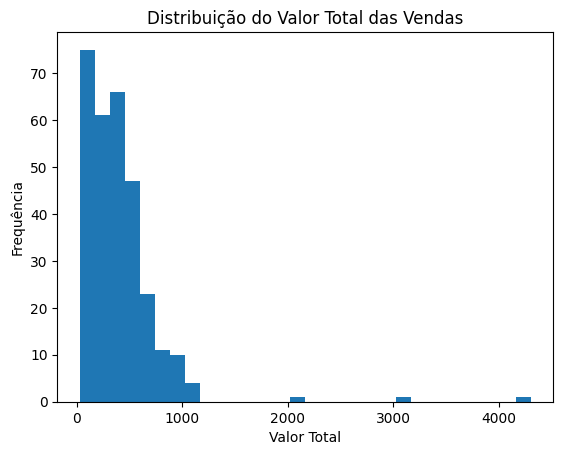

In [47]:
## Histograma do valor total

import matplotlib.pyplot as plt

plt.hist(df["valor_total"], bins=30)
plt.title("Distribuição do Valor Total das Vendas")
plt.xlabel("Valor Total")
plt.ylabel("Frequência")
plt.show()


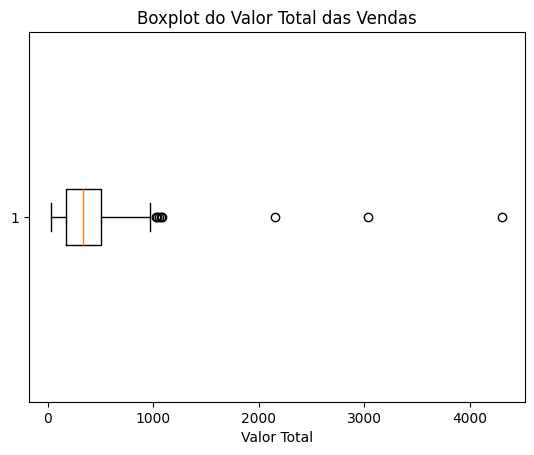

In [48]:
## Boxplot do valor total

plt.boxplot(df["valor_total"], vert=False)
plt.title("Boxplot do Valor Total das Vendas")
plt.xlabel("Valor Total")
plt.show()

## Conclusão e Insights

A análise estatística dos dados de vendas permitiu compreender o comportamento típico das transações, bem como identificar valores atípicos que impactam diretamente as métricas de desempenho. Observou-se que, embora a média forneça uma visão geral do valor das vendas, sua interpretação é influenciada pela presença de outliers.

A mediana mostrou-se uma métrica mais adequada para representar o valor típico das vendas, pois não sofre distorções causadas por valores extremos. A análise de dispersão indicou que a maior parte das vendas está relativamente concentrada em torno desse valor central, reforçando a estabilidade do comportamento principal dos dados.

Foram identificadas vendas atípicas com valores significativamente superiores ao padrão, as quais influenciam o cálculo da média. Em um cenário real, esses registros devem ser analisados separadamente para verificar se representam situações legítimas, como compras em grande volume, ou possíveis inconsistências nos dados.

Do ponto de vista do negócio, essa análise permite ao gestor compreender melhor o padrão de vendas, identificar exceções relevantes e tomar decisões mais precisas, seja para definição de metas, avaliação de desempenho ou estratégias comerciais.
